<a href="https://colab.research.google.com/github/Rajeshpatra12/Agile_Workshop/blob/main/Code%20Alpha%20Task1(Credit%20Score%20Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Patra

# Credit Scoring Model

In [1]:
import pandas as pd

In [5]:
path='/content/train.csv'
df = pd.read_csv(path)

<ipython-input-5-4106181528>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


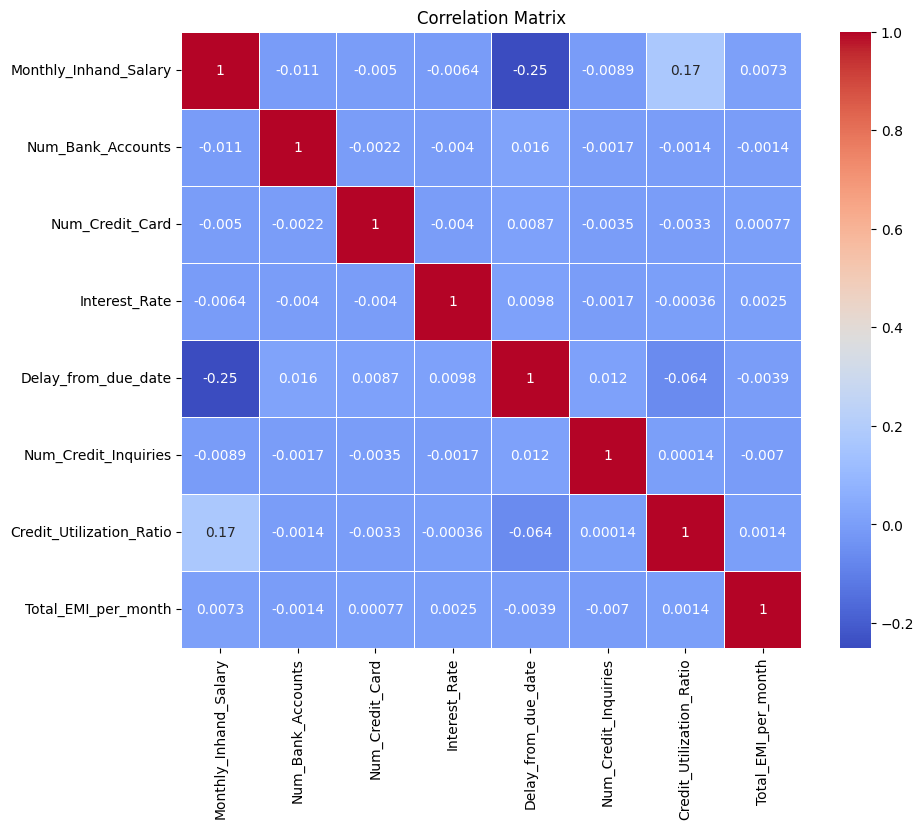

In [7]:
#Select only numeric columns for correlation
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
Y=df['Credit_Score']
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [11]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


# Preprocessing

In [12]:
#fill null values with mean
import numpy as np
#df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna.mean()
#convert object to numeric
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly']).mean()
df['Monthly_Inhand_Salary']=pd.to_numeric(df['Monthly_Inhand_Salary'],errors='coerce')
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary']).mean()

In [13]:
#normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
#convert 1d array to 2d array
Amount_invested_monthly=df['Amount_invested_monthly'].values.reshape(-1,1)
Monthly_Inhand_Salary=df['Monthly_Inhand_Salary'].values.reshape(-1,1)
scaler=MinMaxScaler()
x1=scaler.fit_transform(Amount_invested_monthly)
x2=scaler.fit_transform(Monthly_Inhand_Salary)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x1)
x2=scaler.fit_transform(x2)

In [15]:
#Assuming x1 and x2 are lists or arrays of your feature values
#combine x1 and x2 into a single 2d array for training
x_train = np.column_stack((x1, x2))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
y=df['Credit_Score'].values.reshape(-1,1)
#print(y.value_counts())
#Assuming X is your data with categorical features
#encoder = OneHotEncoder(sparse=false)
#y_encoded = encoder.fit_transform(y)
#X_encoded now contains the one hot encoded categorical data
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=0)
y_train.shape

(80000, 1)

In [17]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [20]:
pip install solver

  Preparing metadata (setup.py) ... done
  Created wheel for solver: filename=solver-0.0.4-py3-none-any.whl size=3111 sha256=bed0a409095ba57c0df635714dd1baf4fd31ce2580838c6d0f3c639a38c9e80a
  Stored in directory: /root/.cache/pip/wheels/8e/94/e1/69ae6962b766b95f6f00fde9e7a5037c05980b209dd47b32dd
Successfully built solver


In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='newton-cg',C=0.05, multi_class='multinomial')
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.05, multi_class='multinomial', solver='newton-cg')

In [23]:
y_pred=model.predict(x_test)

In [24]:
model.score(x_train,y_train)
model.score(x_test,y_test)

0.52925

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[    0,     0,  3589],
       [    0,     0,  5826],
       [    0,     0, 10585]])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      3589
        Poor       0.00      0.00      0.00      5826
    Standard       0.53      1.00      0.69     10585

    accuracy                           0.53     20000
   macro avg       0.18      0.33      0.23     20000
weighted avg       0.28      0.53      0.37     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
